In [1]:
import numpy as np
import pandas as pd
from scipy.stats import binom, poisson, norm, uniform, expon
import matplotlib.pyplot as plt

## Binomial Distribution

In [2]:
n, p = 52, 0.5
mean, var = binom.stats(n, p)
print( mean, var )

26.0 13.0


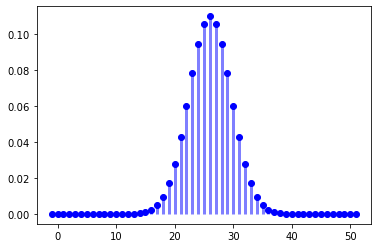

In [3]:
fig = plt.figure( figsize = (6,4) )
x = np.arange(binom.ppf(0, n, p),
              binom.ppf(1, n, p))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=6, label='binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)

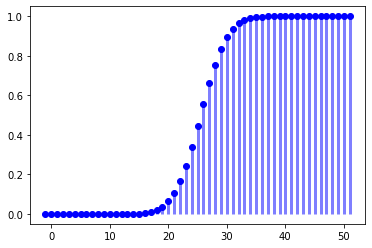

In [4]:
fig = plt.figure( figsize = (6,4) )
x = np.arange(binom.ppf(0, n, p),
              binom.ppf(1, n, p))
plt.plot(x, binom.cdf(x, n, p), 'bo', ms=6, label='binom pmf')
plt.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=3, alpha=0.5)

In [5]:
1 - binom.cdf(36,52,0.5)

0.0015926267238883796

In [6]:
p1 = 1 - binom.cdf(36,52,0.5)
n = 400
1 - binom.pmf(0,400,p1)

0.47141862964046233

## Poisson Distribution

In [7]:
lamb = 5
mean, var = poisson.stats(lamb)
print( mean, var )

5.0 5.0


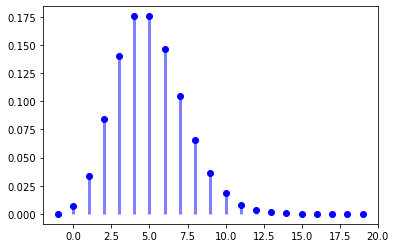

In [8]:
fig = plt.figure( figsize = (6,4) )
x = np.arange(poisson.ppf(0.0, lamb), poisson.ppf(0.9999999, lamb))
plt.plot(x, poisson.pmf(x, lamb), 'bo', ms=6, label='binom pmf')
plt.vlines(x, 0, poisson.pmf(x, lamb), colors='b', lw=3, alpha=0.5)

## Exponential Distribution

In [9]:
lamb = 0.5
mean, var = expon.stats( scale = lamb)
print(mean, var)

0.5 0.25


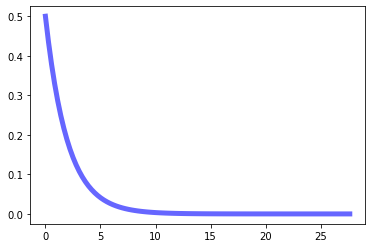

In [10]:
fig = plt.figure( figsize = (6,4) )
x = np.linspace(expon.ppf(0.000001, scale = 1/lamb), expon.ppf(0.999999, scale = 1/lamb), 100)
plt.plot(x, expon.pdf(x, scale = 1/lamb),'b-', lw=5, alpha=0.6, label='expon pdf')

## Uniform Distribution

In [11]:
a = 10
b = 30 
mean, var = uniform.stats(loc = a, scale = b - a)
print(mean, var)

20.0 33.33333333333333


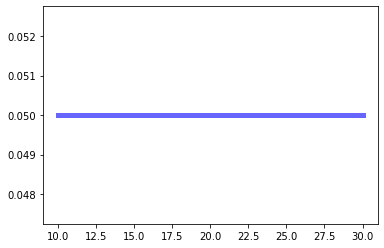

In [12]:
fig = plt.figure( figsize = (6,4) )
x = np.linspace(uniform.ppf(0, loc = a, scale = b - a), uniform.ppf(1, loc = a, scale = b - a), 1000)
plt.plot(x, uniform.pdf(x, loc = a, scale = b - a), 'b-', lw=5, alpha=0.6, label='uniform pdf')

## Normal Distribution

In [13]:
mu = 100
sigma = 25 
mean, var = norm.stats(mu,sigma)
print(mean, var)

100.0 625.0


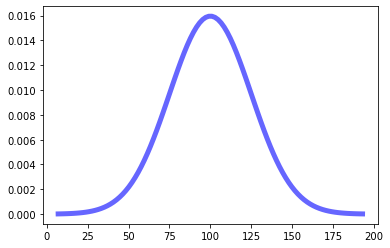

In [14]:
fig = plt.figure( figsize = (6,4) )
x = np.linspace(norm.ppf(0.0001, loc = mu, scale = sigma), norm.ppf(0.9999, loc = mu, scale = sigma), 100)
plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), 'b-', lw=5, alpha=0.6, label='uniform pdf')

In [15]:
norm.cdf(125,mu,sigma) - norm.cdf(75, mu,sigma)

0.6826894921370859

In [16]:
norm.cdf(150,mu,sigma) - norm.cdf(50, mu,sigma)

0.9544997361036416

In [17]:
norm.cdf(175,mu,sigma) - norm.cdf(25, mu,sigma)

0.9973002039367398

## Analysing and fitting data

In [20]:
data = pd.read_csv('Waiting_Time.csv')
print(data.head(5))

   Waiting  Seating
0     10.2     43.3
1      2.3     42.2
2      1.1     49.2
3     11.1     51.2
4      6.5     44.4


(array([49., 24., 14.,  4.,  2.,  3.,  1.,  0.,  1.,  2.]),
 array([ 0.  ,  4.07,  8.14, 12.21, 16.28, 20.35, 24.42, 28.49, 32.56,
        36.63, 40.7 ]),
 <BarContainer object of 10 artists>)

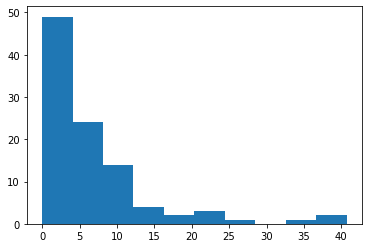

In [22]:
plt.hist( data['Waiting'] )

(array([ 2.,  7.,  4., 17., 27., 14., 14., 10.,  4.,  1.]),
 array([29.6 , 33.31, 37.02, 40.73, 44.44, 48.15, 51.86, 55.57, 59.28,
        62.99, 66.7 ]),
 <BarContainer object of 10 artists>)

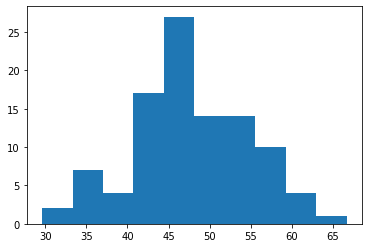

In [24]:
plt.hist( data['Seating'] )

In [29]:
from distfit import distfit

# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform( data['Waiting'].values )

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0110505] [loc=6.743 scale=7.746]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.0127189] [loc=0.000 scale=6.743]
[distfit] >[pareto    ] [0.02 sec] [RSS: 0.0797851] [loc=-1.791 scale=1.791]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 0.0058947] [loc=3.200 scale=4.978]
[distfit] >[t         ] [0.01 sec] [RSS: 0.0023384] [loc=4.208 scale=3.276]
[distfit] >[genextreme] [0.02 sec] [RSS: 0.0144245] [loc=2.870 scale=2.932]
[distfit] >[gamma     ] [0.04 sec] [RSS: 0.0175073] [loc=-0.000 scale=8.311]
[distfit] >[lognorm   ] [0.04 sec] [RSS: 0.0167230] [loc=-0.446 scale=4.512]
[distfit] >[beta      ] [0.05 sec] [RSS: 0.0213847] [loc=-0.000 scale=561.057]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.0387716] [loc=0.000 scale=40.700]
[distfit] >[loggamma  ] [0.03 sec] [RSS: 0.0119467] [loc=-3310.981 scale=418.581]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.t_gen at 0x2095caef5e0>,
  'stats': 'RSS',
  'params': (1.882331637165917, 4.207900031082688, 3.275635803928977),
  'name': 't',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x20960f3d370>,
  'score': 0.002338437258794656,
  'loc': 4.207900031082688,
  'scale': 3.275635803928977,
  'arg': (1.882331637165917,),
  'CII_min_alpha': -5.777404947184814,
  'CII_max_alpha': 14.193205009350187},
 'summary':          distr     score  LLE          loc       scale  \
 0            t  0.002338  NaN       4.2079    3.275636   
 1     dweibull  0.005895  NaN          3.2    4.977577   
 2         norm  0.011051  NaN        6.743    7.746099   
 3     loggamma  0.011947  NaN -3310.980598  418.580769   
 4        expon  0.012719  NaN          0.0       6.743   
 5   genextreme  0.014425  NaN     2.870065    2.932269   
 6      lognorm  0.016723  NaN    -0.446187    4.511793   
 7        gamma  0.017507  NaN         -0.0    8.310534   
 

In [30]:
# Best fitted model
best_distr = dist.model

print(best_distr)

{'distr': <scipy.stats._continuous_distns.t_gen object at 0x000002095CAEF5E0>, 'stats': 'RSS', 'params': (1.882331637165917, 4.207900031082688, 3.275635803928977), 'name': 't', 'model': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020960F3D370>, 'score': 0.002338437258794656, 'loc': 4.207900031082688, 'scale': 3.275635803928977, 'arg': (1.882331637165917,), 'CII_min_alpha': -5.777404947184814, 'CII_max_alpha': 14.193205009350187}


[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: t'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

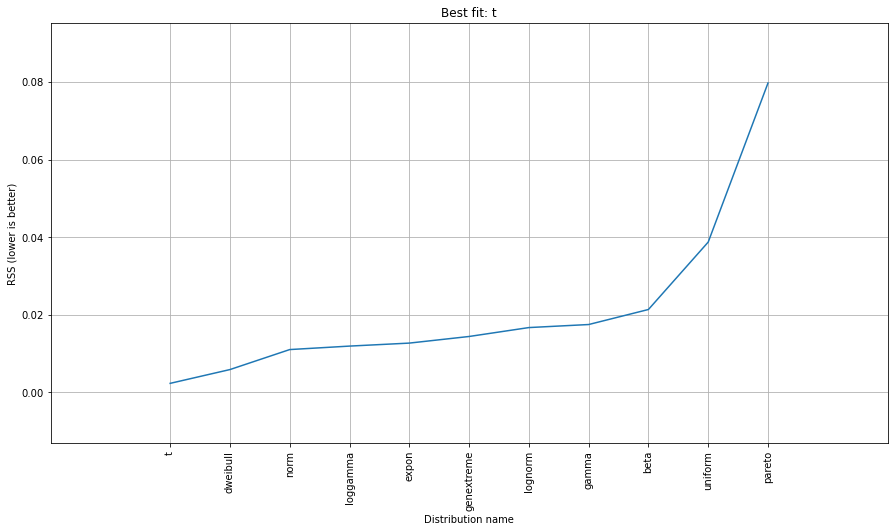

In [31]:
# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

Alternatively, you can also use the `fitter` package:

,sumsquare_error,aic,bic,kl_div
expon,0.047237,989.289893,-756.564383,inf
gamma,0.048095,958.902302,-750.158514,inf
beta,0.048408,996.827819,-744.904843,inf
burr,0.058040,992.840108,-726.759254,inf
norm,0.119183,1135.836300,-664.016375,inf


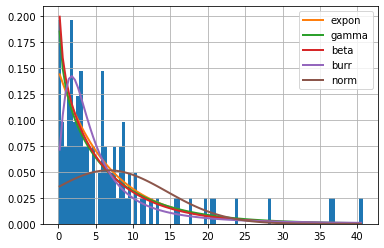

In [35]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(data['Waiting'].values, distributions=['gamma','expon', "beta","burr","norm"]) 
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

,sumsquare_error,aic,bic,kl_div
chi2,0.046664,996.932783,-753.179142,inf
expon,0.047237,989.289893,-756.564383,inf
gamma,0.048095,958.902302,-750.158514,inf
exponpow,0.054120,987.503192,-738.355776,inf
lognorm,0.054546,979.913557,-737.572024,inf


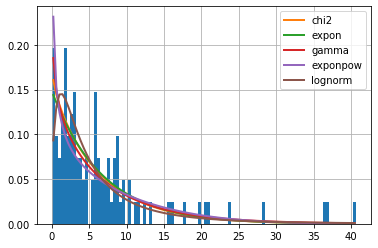

In [38]:
f = Fitter(data['Waiting'].values, distributions=get_common_distributions())
f.fit()
f.summary()

In [39]:
f.get_best(method = 'sumsquare_error')

{'chi2': {'df': 1.9133250200236969,
  'loc': -3.358965550712256e-25,
  'scale': 3.4267357140978754}}

## Analyzing the restaurant demand data

In [49]:
demand_data = pd.read_csv('Store_demand.csv')
demand_data.head(5)

,Date,total,Night_Reservation,Night_No_Reservation,Daytime_Reservation,Daytime_No_Reservation,Highest_Temperature,Lowest_Temperature,Amount_of_Precipitation,Maximum_Precipitaion_in_Ten_Mins,Average_Wind_Speed,Maximum_Wind_Speed,Maximum_Instantaneous_Wind_Speed
0,5/1/2014,191,52,40,11,88,24.5,17.7,23.0,3.0,4.2,7.9,14.5
1,5/2/2014,178,51,39,6,82,25.6,17.3,0.0,0.0,2.7,5.7,9.6
2,5/3/2014,234,0,108,0,126,25.6,15.9,0.0,0.0,2.8,6.5,12.9
3,5/4/2014,293,24,83,20,166,23.0,14.8,0.0,0.0,4.5,8.9,15.9
4,5/5/2014,233,19,86,22,106,20.7,16.7,0.0,0.0,3.9,7.4,15.0


In [50]:
len(demand_data)

729

In [51]:
demand_data.describe()

,total,Night_Reservation,Night_No_Reservation,Daytime_Reservation,Daytime_No_Reservation,Highest_Temperature,Lowest_Temperature,Amount_of_Precipitation,Maximum_Precipitaion_in_Ten_Mins,Average_Wind_Speed,Maximum_Wind_Speed,Maximum_Instantaneous_Wind_Speed
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,267.924554,86.454047,56.936900,58.474623,66.058985,20.869273,13.049657,4.806584,0.668038,2.833059,5.888340,10.373251
std,67.720467,46.430184,23.165586,36.346240,21.839401,7.850258,8.144716,14.622692,1.883694,0.914650,1.749423,3.542006
min,76.000000,0.000000,14.000000,0.000000,20.000000,3.800000,-2.600000,0.000000,0.000000,1.300000,2.800000,3.800000
25%,223.000000,51.000000,40.000000,30.000000,51.000000,13.800000,5.400000,0.000000,0.000000,2.300000,4.600000,7.900000
50%,268.000000,87.000000,54.000000,56.000000,63.000000,21.600000,13.800000,0.000000,0.000000,2.600000,5.600000,9.600000
75%,316.000000,121.000000,71.000000,83.000000,78.000000,27.000000,19.800000,2.000000,0.500000,3.200000,6.700000,12.000000
max,450.000000,205.000000,179.000000,173.000000,166.000000,37.700000,28.000000,156.500000,20.000000,7.300000,12.600000,28.800000


,sumsquare_error,aic,bic,kl_div
norm,0.000525,1129.859367,-10297.005527,inf
gamma,0.000529,1130.954639,-10286.070758,inf
lognorm,0.000561,1124.948977,-10242.359247,inf
rayleigh,0.000566,1113.638022,-10242.722338,inf
cauchy,0.000840,1172.182992,-9954.996895,inf


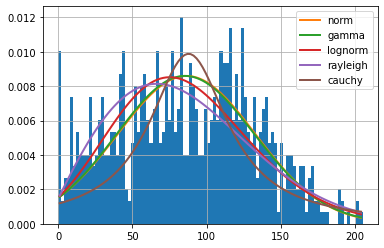

In [72]:
f = Fitter(demand_data['Night_Reservation'].values, distributions=get_common_distributions())
f.fit()
f.summary()

In [73]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 86.45404663923182, 'scale': 46.39832772402796}}

,sumsquare_error,aic,bic,kl_div
gamma,0.000808,1285.140189,-9976.686306,inf
chi2,0.000808,1285.140369,-9976.686225,inf
lognorm,0.000826,1271.303608,-9960.799945,inf
rayleigh,0.000829,1351.659399,-9964.380414,inf
norm,0.001120,1531.560593,-9744.965280,inf


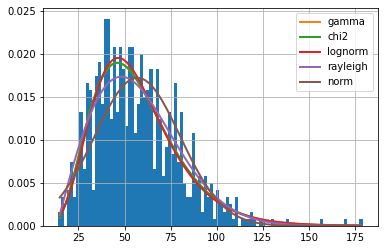

In [74]:
f = Fitter(demand_data['Night_No_Reservation'].values, distributions=get_common_distributions())
f.fit()
f.summary()

In [75]:
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 4.603682109634942,
  'loc': 7.136453961030476,
  'scale': 10.817528167116613}}

,sumsquare_error,aic,bic,kl_div
rayleigh,0.001039,1123.826991,-9800.306516,inf
gamma,0.001104,1120.500250,-9749.044495,inf
lognorm,0.001110,1126.552257,-9745.477197,inf
norm,0.001117,1154.840731,-9747.032906,inf
cauchy,0.001576,1166.918930,-9496.153107,inf


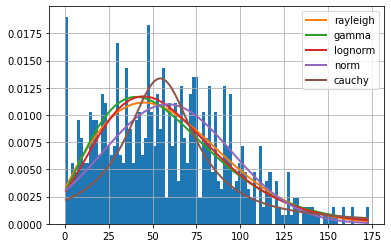

In [76]:
f = Fitter(demand_data['Daytime_Reservation'].values, distributions=get_common_distributions())
f.fit()
f.summary()

In [77]:
f.get_best(method = 'sumsquare_error')

{'rayleigh': {'loc': -9.422089369024418, 'scale': 54.448142896390785}}

,sumsquare_error,aic,bic,kl_div
lognorm,0.001703,1205.388622,-9433.086247,inf
chi2,0.001711,1213.845735,-9429.781130,inf
gamma,0.001711,1213.845527,-9429.780950,inf
rayleigh,0.001736,inf,-9425.716599,inf
norm,0.001944,1329.681609,-9343.457466,inf


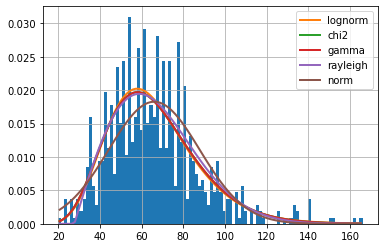

In [78]:
f = Fitter(demand_data['Daytime_No_Reservation'].values, distributions=get_common_distributions())
f.fit()
f.summary()

In [79]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.2713633198199295,
  'loc': -12.169877039868005,
  'scale': 75.39075667192193}}